In [1]:
import math
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

import rescale

In [2]:
alpha=1
C=1 
n=1 
cutoff_wavelength = .2*2*math.pi/100
lx = 2*math.pi/100
ly = lx
field='real'
Q=(int(lx/cutoff_wavelength),int(ly/cutoff_wavelength))

In [3]:

B_matrix_4 = rescale.get_VWmatrix(field='real', maxwavevector=Q, alpha=alpha, n=n, C=C, lx=lx, ly=ly, lambda_is=range(4))[-4:, -4:]


In [4]:
B_matrix_5 = rescale.get_VWmatrix(field='real', maxwavevector=Q, alpha=alpha, n=n, C=C, lx=lx, ly=ly, lambda_is=range(5))[-5:, -5:]


In [5]:
B_matrix_4.real

array([[ 1.58888519, -0.58801324, -0.33673459, -0.58801324],
       [-0.58801324,  1.58888519, -0.58801324, -0.33673459],
       [-0.33673459, -0.58801324,  1.58888519, -0.58801324],
       [-0.58801324, -0.33673459, -0.58801324,  1.58888519]])

In [6]:
B_matrix_5.real

array([[ 2.39231994,  0.2154215 ,  0.46670015,  0.2154215 , -3.2898631 ],
       [ 0.2154215 ,  2.39231994,  0.2154215 ,  0.46670015, -3.2898631 ],
       [ 0.46670015,  0.2154215 ,  2.39231994,  0.2154215 , -3.2898631 ],
       [ 0.2154215 ,  0.46670015,  0.2154215 ,  2.39231994, -3.2898631 ],
       [-3.2898631 , -3.2898631 , -3.2898631 , -3.2898631 , 13.47116148]])

In [7]:
cov_matrix_4 = np.linalg.inv(B_matrix_4)
cov_matrix_4.real

array([[3.64672501, 3.18115256, 3.12741169, 3.18115256],
       [3.18115256, 3.64672501, 3.18115256, 3.12741169],
       [3.12741169, 3.18115256, 3.64672501, 3.18115256],
       [3.18115256, 3.12741169, 3.18115256, 3.64672501]])

cov_matrix_5 = np.linalg.inv(B_matrix_5)
cov_matrix_5.real

In [8]:
cov_matrix_5 = np.linalg.inv(B_matrix_5) 
cov_matrix_5.real

array([[3.64672501, 3.18115256, 3.12741169, 3.18115256, 3.20811945],
       [3.18115256, 3.64672501, 3.18115256, 3.12741169, 3.20811945],
       [3.12741169, 3.18115256, 3.64672501, 3.18115256, 3.20811945],
       [3.18115256, 3.12741169, 3.18115256, 3.64672501, 3.20811945],
       [3.20811945, 3.20811945, 3.20811945, 3.20811945, 3.20811945]])

verify positive-definiteness of covariance matrices


In [9]:
print("cov-4 is positive definite:", np.all(np.linalg.eigvals(cov_matrix_4) > 0))
print("cov-5 is positive definite:", np.all(np.linalg.eigvals(cov_matrix_5) > 0))

cov-4 is positive definite: True
cov-5 is positive definite: True


The covariances matrices show the same covariances between \mu_i no matter how manny additional \mu_i are \`measured\'.  As expected the physics/statistics of the object is the same no matter what we \`measure\'.  

The covariance matrix shows the total covariance, i.e. everything about how the field behaves at that point, whether the correlations are direct or mediated by (and correlated with) the field at other locations.

On the other hand the precision matrix (inverse of covariance matrix) shows something related to partial covariances - only those covariances betwee two points not \`explained by\' other, indirect effects.

### Correlation matrix, precision matrix; partial convariances, conditional covariances in detail
- precision matrix  = inverse correlation matrix
- For N-dimensional Gaussian distributions, partial covariances = conditional covariances


A partial covariance matrix between the first 4 boundary points extracted from the 5-element version

In [10]:
cov_partial = np.zeros((4,4), dtype=complex)
fifth_entry= [[cov_matrix_5[-1,-1]]]
#print(cov_matrix_5[-1:,:-1].real, np.linalg.inv(fifth_entry).real, cov_matrix_5[:-1,-1:].real)
cov_partial = cov_matrix_5[:-1,:-1] - np.matmul( cov_matrix_5[:-1,-1:], np.matmul(
                   np.linalg.inv(fifth_entry), cov_matrix_5[-1:,:-1] ))
print("C_(j|5) = ",cov_partial.real)    

C_(j|5) =  [[ 0.43860556 -0.02696689 -0.08070776 -0.02696689]
 [-0.02696689  0.43860556 -0.02696689 -0.08070776]
 [-0.08070776 -0.02696689  0.43860556 -0.02696689]
 [-0.02696689 -0.08070776 -0.02696689  0.43860556]]


this is not equal to C^4_j. 

In [11]:
print("C^4=\n" , cov_matrix_4.real)

C^4=
 [[3.64672501 3.18115256 3.12741169 3.18115256]
 [3.18115256 3.64672501 3.18115256 3.12741169]
 [3.12741169 3.18115256 3.64672501 3.18115256]
 [3.18115256 3.12741169 3.18115256 3.64672501]]


 C^4_j is the covariances between the 4 boundary points when everything is alloweed to flucutate. C_{j|5} is the covariances between the 4 boundary points when the mean (5th condition) is constrained to a constant.
 
 We see that when the mean is held constant, values at the boundary conitions fluctuate less widely and are slightly anticorrelated with each other.

In [12]:
print("inv of partial covariances extracted from 5 constrain covs", np.linalg.inv(cov_partial).real, sep="\n")
print("B matrix measured from 4 points from the start", B_matrix_4.real, sep="\n")

inv of partial covariances extracted from 5 constrain covs
[[2.39231994 0.2154215  0.46670015 0.2154215 ]
 [0.2154215  2.39231994 0.2154215  0.46670015]
 [0.46670015 0.2154215  2.39231994 0.2154215 ]
 [0.2154215  0.46670015 0.2154215  2.39231994]]
B matrix measured from 4 points from the start
[[ 1.58888519 -0.58801324 -0.33673459 -0.58801324]
 [-0.58801324  1.58888519 -0.58801324 -0.33673459]
 [-0.33673459 -0.58801324  1.58888519 -0.58801324]
 [-0.58801324 -0.33673459 -0.58801324  1.58888519]]


Like B^5, the partial cov matrix does not hvae expected negative entries like B_13.

Only B^4 does.

1: effects due to mean are excluded, only additional info is shown

2: effects via mean are incorporated into correlations

In [13]:
print(B_matrix_5[:4,:4].real)

[[2.39231994 0.2154215  0.46670015 0.2154215 ]
 [0.2154215  2.39231994 0.2154215  0.46670015]
 [0.46670015 0.2154215  2.39231994 0.2154215 ]
 [0.2154215  0.46670015 0.2154215  2.39231994]]


this does not have the desired properties.  What does this represent?  What do the raw individual elements of a precision matrix mean?

In [14]:

#print(cov_matrix_5[-1:,:-1].real, np.linalg.inv(fifth_entry).real, cov_matrix_5[:-1,-1:].real)
cov_partial_55 = cov_matrix_5[-1:,-1:] - np.matmul( cov_matrix_5[-1:,:-1], np.matmul(
                   np.linalg.inv(cov_matrix_5[:-1,:-1]), cov_matrix_5[:-1,-1:] ))
print("C_(55|j) = ",cov_partial_55.real)  
print("inverse ",np.linalg.inv(cov_partial_55).real)  

C_(55|j) =  [[0.07423265]]
inverse  [[13.47116148]]


Matching exactly the element of precision matrix.  This leads me to believe that elements of precision matrix mean:  Partial (co-)variance of two or one variable, letting the other three or four be fixed.

Why is B_{13} = inv(C_{13|245}) not the element we want?  Because most correlation between 1 and 3 is mediated by what happens at 5.  The rest not \`explained by\' this is small, inconsequential, and has the wrong sign. 

# How to estimate effective potential from covariance matrix

The covariance matrix is the same no matter is it was derived for 4 or 5 boundary conditions.  The 5x5 covariance matrix contains the most complete and universal information, so we take this as our starting point.

B^5_{55} = 13.47 holds the information: the mean on the cell varies little, if all the other points are held at some constant value.  
Is this what we want in alpha'?

C^5_{55} = 3.2 holds the information: when everything fluctuates, the value of the mean varies more and behaves much like the value at each of the five points.

What is a corresponding precision?  Perhaps it is this value.

In [15]:
lx = 2*math.pi/100
ly=lx
Q=(int(lx/cutoff_wavelength),int(ly/cutoff_wavelength))
B_matrix_1 = rescale.get_VWmatrix(field='real', maxwavevector=Q, alpha=alpha, n=n, C=C, lx=lx, ly=ly, lambda_is=[4])[-1:, -1:]


In [16]:
B_matrix_1

array([[0.31170909+0.j]])

In [17]:
np.linalg.inv(B_matrix_1)

array([[3.20811945+0.j]])

It is this value, or could hvae just 1/C_55

Another thing: does F_0 \sim ln sqrt 1/det(A) depend on how many boundary points are \`measured\'?

The mean varies a lot (precision .33) when everything else is not held constant.  Is this the information we want in alpha' ?

Big difference here between precision matrix element and 1/covaraiance matrix element.

We want the property of C_55 that precision scales with area: fluctuations in the mean of a large number of oscillators are smaller with increasing number of oscillators.  Do B_{jj|5} (diagonal of inverse conditional covariance matrix) and B_jj (diagonal of precision matrix derived from only 4 points) have this property?  Does the much smaller precision 1/C_55 , precision of mean when everything fluctuates, have this property?

Retrieve a few B^5, B^4.


In [3]:
lxs = [x*2*math.pi/100 for x in [1,2,2.5,3,3.2,3.5,3.7,4,4.2,4.5,5,6]]
B_matrices_4 = []
B_matrices_5 = []

In [19]:
for lx in lxs:
    ly = lx
    Q=(int(lx/cutoff_wavelength),int(ly/cutoff_wavelength))
    print(Q)
    B_matrix_4 = rescale.get_VWmatrix(field='real', maxwavevector=Q, alpha=alpha, n=n, C=C, lx=lx, ly=ly, lambda_is=range(4))[-4:, -4:]
    B_matrices_4.append(B_matrix_4)
    B_matrix_5 = rescale.get_VWmatrix(field='real', maxwavevector=Q, alpha=alpha, n=n, C=C, lx=lx, ly=ly, lambda_is=range(5))[-5:, -5:]
    B_matrices_5.append(B_matrix_5)

(5, 5)
(10, 10)
(12, 12)
(14, 14)
(16, 16)
(17, 17)
(18, 18)
(20, 20)
(21, 21)
(22, 22)
(25, 25)
(29, 29)


In [20]:
cov_matrices_4=[]
cov_matrices_5=[]
for m in B_matrices_4:
    cov_matrices_4.append(np.linalg.inv(m))
for m in B_matrices_5:
    cov_matrices_5.append(np.linalg.inv(m))
cov_matrices_cond_on_5=[]
prec_matrices_cond_on_5=[]
for B,C_ in zip(B_matrices_5, cov_matrices_5):
    fifth_entry= [[C_[-1,-1]]]
    cov_partial = C_[:-1,:-1] - np.matmul( C_[:-1,-1:], np.matmul(
                   np.linalg.inv(fifth_entry), C_[-1:,:-1] ))
    cov_matrices_cond_on_5.append(cov_partial)
    prec_matrices_cond_on_5.append(np.linalg.inv(cov_partial))

In [21]:
[x.real for x in B_matrices_5]

[array([[ 2.39231994,  0.2154215 ,  0.46670015,  0.2154215 , -3.2898631 ],
        [ 0.2154215 ,  2.39231994,  0.2154215 ,  0.46670015, -3.2898631 ],
        [ 0.46670015,  0.2154215 ,  2.39231994,  0.2154215 , -3.2898631 ],
        [ 0.2154215 ,  0.46670015,  0.2154215 ,  2.39231994, -3.2898631 ],
        [-3.2898631 , -3.2898631 , -3.2898631 , -3.2898631 , 13.47116148]]),
 array([[ 1.86164532,  0.12375846,  0.27353622,  0.12393236, -2.38287236],
        [ 0.12243131,  1.86229432,  0.12240922,  0.27409757, -2.38123242],
        [ 0.2735306 ,  0.12301615,  1.86132275,  0.12406176, -2.38193125],
        [ 0.12252004,  0.27376825,  0.12249403,  1.86295173, -2.38173406],
        [-2.38012727, -2.38283719, -2.37976223, -2.38504343, 10.77460649]]),
 array([[ 1.69347586, -0.70030834,  0.32319542,  0.87435565, -2.19071857],
        [ 0.09747776,  1.64143663,  0.12546835,  0.45978387, -2.32416661],
        [ 0.26970395,  0.57759377,  1.70873034, -0.6385671 , -1.91746097],
        [ 0.13414014,

We would really like to use the information B_55, this is the only one where precision (narrowness) in the mean scales with area as expected.

We also need the information in B_5j (negative values -> correlations between different positions, leads to expected sign of gradient term), whether directly or indirectly as in B^4_ij. 

I want to just take B^5 and mach it to an effective free energy with assymetric backwards derivatives (whihc is in fact how the lattice simulation is done at the moment).

The only alternative that also contains the information from B^5_55 and B^5_{5j} is to take alpha' mainly from B^5_55 (the area scaling signal is lost boundary point precisions of precision matrix conditioned on 5, in diagonal of B^4).

And take gradient information from B^4, which includes the effect mediated via fluctuating mean value.  Direct B^5_{5j} info would be either discarded or added into magnitude term as a correction.

This alternative is more complicated to interpret the validity of.

Direct equality Z=... * e^{-muBmu} = ... * e^{-beta H(mu)} is more exactly preserved by including as many large terms as possible from B in H.

The 'just use B^4', 'estimate magnitude as average of four boundary points' idea: this doesn't include the information that fluctuations in mean are narrower when it's a mean of a bigger area - but we need the field to act this way so that value in a big cell acts like mean of value in several smaller cells.  Not like value at a point.   Why? ?? 

Metropolis decisions are made based on Hamiltonian total (not density) in a cell.  Total energy (difference) in a cell as estimated from an indicative value can't be obtained from a point.  If we take this point to indicate that the value on the cell is uniformly that value, then the uniform field on the cell will fluctuate a lot regardless of cell size.  Not realistic.


In [22]:
[x.real for x in B_matrices_4]

[array([[ 1.58888519, -0.58801324, -0.33673459, -0.58801324],
        [-0.58801324,  1.58888519, -0.58801324, -0.33673459],
        [-0.33673459, -0.58801324,  1.58888519, -0.58801324],
        [-0.58801324, -0.33673459, -0.58801324,  1.58888519]]),
 array([[ 1.33581881, -0.40347052, -0.25284119, -0.40405185],
        [-0.40402153,  1.33516591, -0.40337248, -0.2521118 ],
        [-0.25269202, -0.40393254,  1.33574535, -0.40364226],
        [-0.40362011, -0.25246179, -0.40387322,  1.33551119]]),
 array([[ 1.31868918, -0.35163219, -0.2194749 , -0.34586097],
        [-0.32589616,  1.31833198, -0.37945731, -0.21205361],
        [-0.23042548, -0.34452187,  1.33128777, -0.35558763],
        [-0.36844196, -0.22058369, -0.32763707,  1.31263455]]),
 array([[ 1.32550733, -0.30497096, -0.1896052 , -0.30323744],
        [-0.30344011,  1.32485731, -0.30588881, -0.18655042],
        [-0.18958746, -0.30339351,  1.32583129, -0.3049702 ],
        [-0.30571331, -0.18665208, -0.30327078,  1.32468751]]),


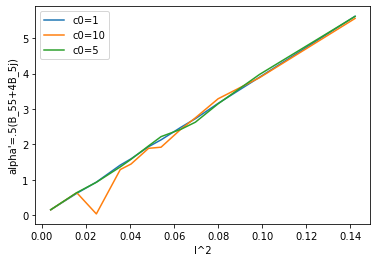

In [34]:
plt.plot([l**2 for l in lxs], [.5*(x[4,4].real+4*x[0,4].real) for x in B_matrices_5], label='c0=1')
plt.plot([l**2 for l in lxs], [.5*(x[4,4].real+4*x[0,4].real) for x in B_matrices_5_highC],label='c0=10')
plt.plot([l**2 for l in lxs], [.5*(x[4,4].real+4*x[0,4].real) for x in B_matrices_5_C5],label='c0=5')
plt.xlabel('l^2')
plt.ylabel("alpha\'=.5(B_55+4B_5j)")
plt.legend()
plt.show()

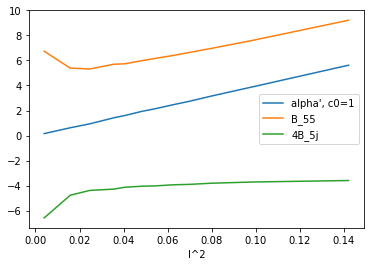

In [24]:
plt.plot([l**2 for l in lxs], [.5*(x[4,4].real+4*x[0,4].real) for x in B_matrices_5], label="alpha', c0=1")
plt.plot([l**2 for l in lxs], [.5*(x[4,4].real) for x in B_matrices_5], label='B_55')
plt.plot([l**2 for l in lxs], [.5*(4*x[0,4].real) for x in B_matrices_5], label='4B_5j')
plt.xlabel('l^2')
plt.legend()
plt.show()

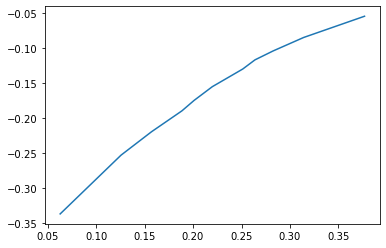

In [25]:
plt.plot(lxs, [x[0,2].real for x in B_matrices_4])
plt.show()

In [26]:
alpha=0
B_matrices_4_a0=[]

In [27]:
for lx in lxs:
    ly = lx
    Q=(int(lx/cutoff_wavelength),int(ly/cutoff_wavelength))
    print(Q)
    B_matrix_4_a0 = rescale.get_VWmatrix(field='real', maxwavevector=Q, alpha=alpha, n=n, C=C, lx=lx, ly=ly, lambda_is=range(4))[-4:, -4:]
    B_matrices_4_a0.append(B_matrix_4_a0)

(5, 5)
(10, 10)
(12, 12)
(14, 14)
(16, 16)
(17, 17)
(18, 18)
(20, 20)
(21, 21)
(22, 22)
(25, 25)
(29, 29)


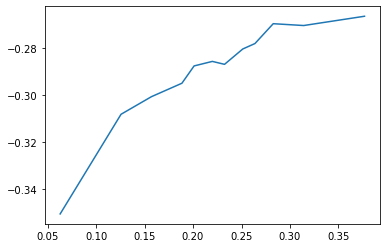

In [28]:
plt.plot(lxs, [x[0,2].real for x in B_matrices_4_a0])
plt.show()

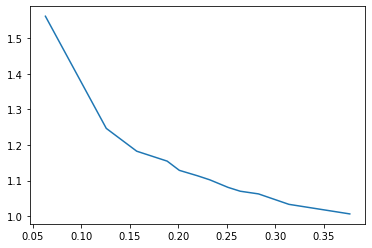

In [29]:
plt.plot(lxs, [x[0,0].real for x in B_matrices_4_a0])
plt.show()

In [30]:
alpha=1
C=10
B_matrices_5_highC=[]

In [31]:
for lx in lxs:
    ly = lx
    Q=(int(lx/cutoff_wavelength),int(ly/cutoff_wavelength))
    print(Q)
    B_matrix_5_highC = rescale.get_VWmatrix(field='real', maxwavevector=Q, alpha=alpha, n=n, C=C, lx=lx, ly=ly, lambda_is=range(5))[-5:, -5:]
    B_matrices_5_highC.append(B_matrix_5_highC)

(5, 5)
(10, 10)
(12, 12)
(14, 14)
(16, 16)
(17, 17)
(18, 18)
(20, 20)
(21, 21)
(22, 22)
(25, 25)
(29, 29)


In [32]:
alpha=1
C=5
B_matrices_5_C5=[]
for lx in lxs:
    ly = lx
    Q=(int(lx/cutoff_wavelength),int(ly/cutoff_wavelength))
    print(Q)
    B_matrix_5_C5 = rescale.get_VWmatrix(field='real', maxwavevector=Q, alpha=alpha, n=n, C=C, lx=lx, ly=ly, lambda_is=range(5))[-5:, -5:]
    B_matrices_5_C5.append(B_matrix_5_C5)

(5, 5)
(10, 10)
(12, 12)
(14, 14)
(16, 16)
(17, 17)
(18, 18)
(20, 20)
(21, 21)
(22, 22)
(25, 25)
(29, 29)


In [19]:
alpha=1
C=0
B_matrices_1=[]
cutoff_wavelength=1*math.pi/100

In [20]:
for lx in lxs:
    ly = lx
    Q=(int(lx/cutoff_wavelength),int(ly/cutoff_wavelength))
    print(Q)
    B_matrix_1 = rescale.get_VWmatrix(field='real', maxwavevector=Q, alpha=alpha, n=n, C=C, lx=lx, ly=ly, lambda_is=range(4,5))[-1:, -1:]
    B_matrices_1.append(B_matrix_1)

(2, 2)
det A (3.5114606789183833e-12+0j)
det A' (4.1180878853137324e-09+0j)
(4, 4)
det A (7.128454328824652e-71+0j)
det A' (5.641711910061748e-75+0j)
(5, 5)
det A (-1.8111953981758447e-120+0j)
det A' (2.774943614764666e-155+0j)
(5, 5)
det A (2.5935024855848794e-100+0j)
det A' (1.2949550991060021e-142+0j)
(6, 6)
det A (9.235591055839214e-181+0j)
det A' (3.776953455329364e-277+0j)
(7, 7)
det A (-2.3176368250496336e-242+0j)
det A' -0j
(7, 7)
det A (2.085323489202862e-226+0j)
det A' 0j
(8, 8)
det A (9.617853e-316+0j)
det A' 0j
(8, 8)
det A (3.515425e-318+0j)
det A' 0j
(9, 9)
det A (-0+0j)
det A' 0j
(10, 10)
det A 0j
det A' (-0+0j)
(11, 11)
det A (-0+0j)
det A' 0j


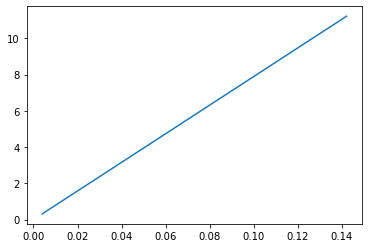

In [8]:
plt.plot([l**2 for l in lxs],[x.real[0,0] for x in B_matrices_1])